#  Step 0: Environment Setup

Before working with the dataset, we first install all required Python libraries.
These libraries support tasks such as:
- **Data manipulation:** pandas, numpy  
- **Visualization:** matplotlib, seaborn  
- **Text processing:** nltk, spacy, textstat  
- **Feature extraction:** sentence-transformers (SBERT) and transformers (BERT)  
- **Model evaluation:** scikit-learn  
- **Dataset retrieval:** kaggle

This setup step ensures a consistent environment



In [1]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn nltk spacy textstat sentence-transformers transformers kaggle
import sys, subprocess
subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"], check=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.6 MB/s eta 0:00:00


CompletedProcess(args=['/usr/bin/python3', '-m', 'spacy', 'download', 'en_core_web_sm'], returncode=0)

UPLOAD DATASET FILE

In [3]:
from google.colab import files
uploaded = files.upload()  # choose training_set_rel3.tsv or asap-aes.zip


Saving training_set_rel3.xlsx to training_set_rel3.xlsx


LOAD THE DATASET

In [6]:
import pandas as pd

# Load dataset
df = pd.read_excel("training_set_rel3.xlsx")

# Display shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (12978, 28)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EXPLORE DATASET STRUCTURE

In [7]:
# View available columns
print(df.columns.tolist())

# Check all essay sets available
print("\nEssay sets and their counts:")
print(df['essay_set'].value_counts().sort_index())


['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2', 'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6']

Essay sets and their counts:
essay_set
1    1783
2    1800
3    1726
4    1772
5    1805
6    1800
7    1569
8     723
Name: count, dtype: int64


FILTER OUT ARGUMENTATIVE ESSAYS

In [8]:
# Filter argumentative essay prompts
df_filtered = df[df['essay_set'].isin([2, 6])].copy()

print("Filtered essays:", df_filtered.shape)
print(df_filtered['essay_set'].value_counts())



Filtered essays: (3600, 28)
essay_set
2    1800
6    1800
Name: count, dtype: int64


KEEP ONLY USEFUL COLUMNS

In [9]:
# Keep essential columns
df_filtered = df_filtered[['essay_id', 'essay_set', 'essay', 'domain1_score']]

# Rename columns for clarity
df_filtered = df_filtered.rename(columns={
    'essay_set': 'prompt',
    'domain1_score': 'score'
})

df_filtered.head()



,essay_id,prompt,essay,score
1783,2978,2,Certain materials being removed from libraries...,4.0
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0
1785,2980,2,Do you think that libraries should remove cert...,2.0
1786,2981,2,"In @DATE1's world, there are many things found...",4.0
1787,2982,2,In life you have the 'offensive things'. The l...,4.0


CHECK FOR MISSING VALUES

In [10]:
print("Missing values per column:\n", df_filtered.isnull().sum())



Missing values per column:
 essay_id    0
prompt      0
essay       0
score       0
dtype: int64


SAVE THE FILTERED DATASET

In [11]:
df_filtered.to_csv("asap_argumentative.csv", index=False)
print("✅ Saved filtered dataset as 'asap_argumentative.csv' with", len(df_filtered), "rows.")



✅ Saved filtered dataset as 'asap_argumentative.csv' with 3600 rows.


QUICK CHECK FOR SCORES

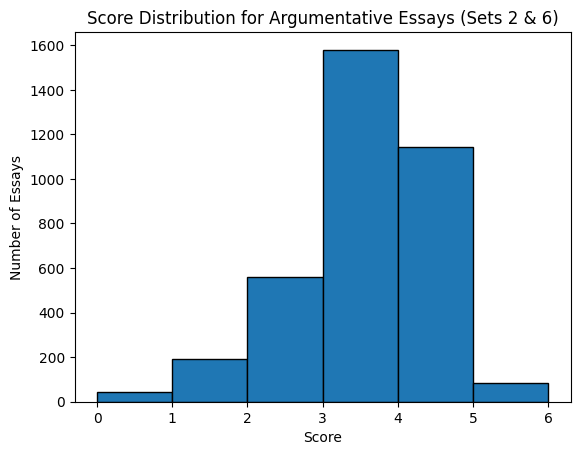

In [12]:
import matplotlib.pyplot as plt

plt.hist(df_filtered['score'], bins=6, edgecolor='black')
plt.title("Score Distribution for Argumentative Essays (Sets 2 & 6)")
plt.xlabel("Score")
plt.ylabel("Number of Essays")
plt.show()



**TEXT PREPROCESSING**
# Step 1: Load the Filtered Dataset
We start with the cleaned argumentative essay dataset saved earlier.


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("asap_argumentative.csv")

print("Dataset shape:", df.shape)
df.head(3)


Dataset shape: (3600, 4)


,essay_id,prompt,essay,score
0,2978,2,Certain materials being removed from libraries...,4.0
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0
2,2980,2,Do you think that libraries should remove cert...,2.0


# Step 2: Basic Text Cleaning
We clean the essays by:
- Lowercasing all text
- Removing punctuation, numbers, and extra whitespace


In [14]:
import re

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['essay'].apply(clean_text)

# Preview cleaned text
df[['essay', 'clean_text']].head(2)


,essay,clean_text
0,Certain materials being removed from libraries...,certain materials being removed from libraries...
1,Write a persuasive essay to a newspaper reflec...,write a persuasive essay to a newspaper reflec...


# Step 3: Tokenization, Stopword Removal, and Lemmatization
We use **spaCy** for efficient NLP preprocessing.


In [15]:
!pip install -q spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 102.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
import spacy
from tqdm import tqdm

# Load English NLP model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Function for tokenization + stopword removal + lemmatization
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc
              if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Apply preprocessing
tqdm.pandas()  # Progress bar
df['processed_text'] = df['clean_text'].progress_apply(preprocess_text)

df[['clean_text', 'processed_text']].head(2)


100%|██████████| 3600/3600 [02:15<00:00, 26.59it/s]


,clean_text,processed_text
0,certain materials being removed from libraries...,certain material remove library book music mag...
1,write a persuasive essay to a newspaper reflec...,write persuasive essay newspaper reflect view ...


# Step 4: Verify and Save the Preprocessed Data
We check for missing values and save the cleaned essays for future stages.


In [17]:
print("Missing values:\n", df.isnull().sum())
df.to_csv("asap_preprocessed.csv", index=False)
print("✅ Saved preprocessed dataset as asap_preprocessed.csv")


Missing values:
 essay_id          0
prompt            0
essay             0
score             0
clean_text        0
processed_text    0
dtype: int64
✅ Saved preprocessed dataset as asap_preprocessed.csv


** FEATURE EXTRACTION**
# Step 1: Load Preprocessed Dataset
We start with the essays we cleaned and lemmatized earlier.


In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv("asap_preprocessed.csv")

print("Shape:", df.shape)
df.head(3)


Shape: (3600, 6)


,essay_id,prompt,essay,score,clean_text,processed_text
0,2978,2,Certain materials being removed from libraries...,4.0,certain materials being removed from libraries...,certain material remove library book music mag...
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,write a persuasive essay to a newspaper reflec...,write persuasive essay newspaper reflect view ...
2,2980,2,Do you think that libraries should remove cert...,2.0,do you think that libraries should remove cert...,think library remove certain material shelf pe...


# Step 2: Linguistic Feature Extraction
We compute text-based features using NLTK and basic Python functions:
- Word count
- Sentence count
- Average sentence length
- Lexical diversity (unique words / total words)


In [19]:
import nltk
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab') # Add this line

from nltk.tokenize import sent_tokenize, word_tokenize

def extract_features(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    num_sentences = len(sentences)
    num_words = len(words)
    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
    lexical_diversity = len(set(words)) / num_words if num_words > 0 else 0

    return pd.Series({
        "word_count": num_words,
        "sentence_count": num_sentences,
        "avg_sentence_length": avg_sentence_length,
        "lexical_diversity": lexical_diversity
    })

df_features = df['essay'].apply(extract_features)
df = pd.concat([df, df_features], axis=1)
df.head(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,essay_id,prompt,essay,score,clean_text,processed_text,word_count,sentence_count,avg_sentence_length,lexical_diversity
0,2978,2,Certain materials being removed from libraries...,4.0,certain materials being removed from libraries...,certain material remove library book music mag...,537.0,19.0,28.263158,0.391061
1,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,write a persuasive essay to a newspaper reflec...,write persuasive essay newspaper reflect view ...,178.0,3.0,59.333333,0.466292
2,2980,2,Do you think that libraries should remove cert...,2.0,do you think that libraries should remove cert...,think library remove certain material shelf pe...,261.0,15.0,17.400000,0.482759


# Step 3: Semantic Feature Extraction Using BERT
We use a pre-trained BERT model (from Hugging Face Transformers)
to extract embeddings that represent contextual meaning.


In [20]:
!pip install -q transformers torch

from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# Load pre-trained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # inference mode

def get_bert_embedding(text):
    # Tokenize and convert to tensor
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Average embedding from last hidden state
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

# Generate BERT embeddings for a small sample first to test speed
sample_embeddings = df['processed_text'].head(3).apply(get_bert_embedding)
print("BERT embedding shape (per essay):", sample_embeddings.iloc[0].shape)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT embedding shape (per essay): (768,)


# Step 4: Combine Linguistic and Semantic Features
We merge both feature types into one DataFrame for model training.


In [21]:
import numpy as np

# Create matrix from embeddings
embeddings = np.vstack(df['processed_text'].apply(get_bert_embedding))

# Convert embeddings to DataFrame
bert_df = pd.DataFrame(embeddings)
bert_df.columns = [f"bert_{i}" for i in range(bert_df.shape[1])]

# Merge with linguistic features and target variable
df_final = pd.concat([df[['essay_id', 'prompt', 'score']], df_features, bert_df], axis=1)

print("Final feature shape:", df_final.shape)
df_final.head(2)


Final feature shape: (3600, 775)


,essay_id,prompt,score,word_count,sentence_count,avg_sentence_length,lexical_diversity,bert_0,bert_1,bert_2,...,bert_758,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767
0,2978,2,4.0,537.0,19.0,28.263158,0.391061,0.109482,0.176751,0.425075,...,0.023528,-0.502451,0.231317,0.076265,-0.115331,-0.014337,-0.338436,-0.110271,-0.075820,-0.320440
1,2979,2,1.0,178.0,3.0,59.333333,0.466292,0.255946,-0.045905,0.699330,...,0.056024,-0.559243,0.247420,0.012281,0.010393,0.183647,-0.375617,-0.315261,-0.187922,0.022256


# Step 5: Save Feature Dataset
We save our final feature matrix for model training.


In [23]:
df_final.to_csv("asap_features.csv", index=False)
print(" Saved final feature dataset as asap_features.csv")


 Saved final feature dataset as asap_features.csv


# Load Feature Dataset

We load the precomputed linguistic and semantic features.
For the baseline model, we will use only linguistic features.


In [24]:
import pandas as pd

# Load feature dataset
df = pd.read_csv("asap_features.csv")

# Display shape and preview
print("Dataset shape:", df.shape)
df.head(3)


Dataset shape: (3600, 775)


,essay_id,prompt,score,word_count,sentence_count,avg_sentence_length,lexical_diversity,bert_0,bert_1,bert_2,...,bert_758,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767
0,2978,2,4.0,537.0,19.0,28.263158,0.391061,0.109482,0.176751,0.425075,...,0.023528,-0.502451,0.231317,0.076265,-0.115331,-0.014337,-0.338436,-0.110271,-0.075820,-0.320440
1,2979,2,1.0,178.0,3.0,59.333333,0.466292,0.255946,-0.045905,0.699330,...,0.056024,-0.559243,0.247420,0.012281,0.010393,0.183647,-0.375617,-0.315261,-0.187922,0.022256
2,2980,2,2.0,261.0,15.0,17.400000,0.482759,0.119141,-0.036242,0.615509,...,-0.167084,-0.384349,0.102473,0.135012,-0.173873,-0.220206,-0.229182,-0.089920,-0.181096,-0.308468


# Select Linguistic Features
We will use these 4 numeric features for our baseline model:
- word_count
- sentence_count
- avg_sentence_length
- lexical_diversity


In [25]:
X = df[['word_count', 'sentence_count', 'avg_sentence_length', 'lexical_diversity']]
y = df['score']

print("Feature matrix shape:", X.shape)


Feature matrix shape: (3600, 4)


# Step 3: Split Data into Training and Test Sets
We use an 80/20 split to evaluate model generalization.


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['prompt']
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 2880
Testing samples: 720


# Step 4: Train a Baseline Model
We use a Random Forest Regressor because:
- It handles nonlinear relationships
- It’s robust to outliers
- It provides feature importance


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_baseline = RandomForestRegressor(n_estimators=200, random_state=42)
rf_baseline.fit(X_train, y_train)

y_pred = rf_baseline.predict(X_test)


# Step 5: Evaluate Baseline Model
We use:
- Mean Squared Error (MSE)
- R² Score
- Quadratic Weighted Kappa (QWK)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import cohen_kappa_score
import numpy as np

# Round predictions to nearest integer for QWK
y_pred_rounded = np.rint(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 1, 6)  # Ensure within 1–6 score range

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
qwk = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Quadratic Weighted Kappa (QWK): {qwk:.4f}")


Mean Squared Error: 0.4304
R² Score: 0.5336
Quadratic Weighted Kappa (QWK): 0.6649


# Step 6: Analyze Feature Importance
We visualize which linguistic features had the greatest impact on the model.


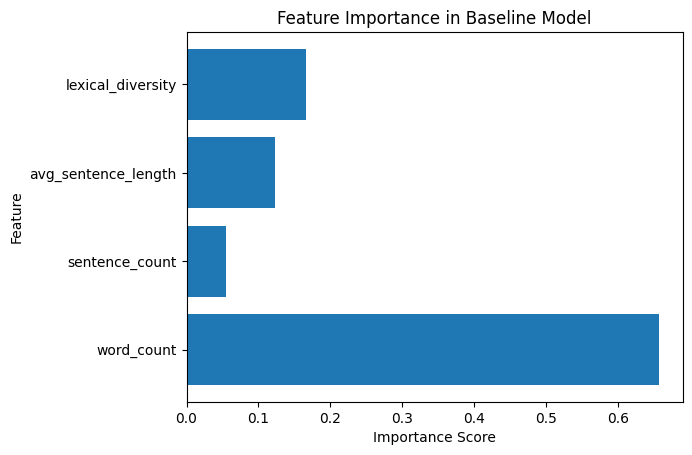

In [29]:
import matplotlib.pyplot as plt

importances = rf_baseline.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Baseline Model")
plt.show()


# Train a Hybrid AES Model (Linguistic + BERT Features)

 Step 1 — Prepare the Data

We’ll use all the features (linguistic + BERT) for the hybrid model.

In [30]:
import pandas as pd

# Load full feature dataset
df = pd.read_csv("asap_features.csv")

# Drop unnecessary columns
feature_cols = [col for col in df.columns if col.startswith("word_count")
                or col.startswith("sentence_count")
                or col.startswith("avg_sentence_length")
                or col.startswith("lexical_diversity")
                or col.startswith("bert_")]

X = df[feature_cols]
y = df['score']

print("Total features:", X.shape[1])
print("Dataset shape:", X.shape)


Total features: 772
Dataset shape: (3600, 772)


Step 2 — Split the Data

We’ll again use an 80/20 split, stratified by prompt (Set 2 and Set 6).

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['prompt']
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 2880
Testing samples: 720


Step 3 — Train the Hybrid Model

Let’s use a Gradient Boosting Regressor (LightGBM) — it’s efficient for high-dimensional data like this.

In [32]:
!pip install -q lightgbm

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, cohen_kappa_score
import numpy as np

# Train model
lgb_model = lgb.LGBMRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=10,
    random_state=42
)

lgb_model.fit(X_train, y_train)

# Predict
y_pred = lgb_model.predict(X_test)
y_pred_rounded = np.rint(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 1, 6)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196656
[LightGBM] [Info] Number of data points in the train set: 2880, number of used features: 772
[LightGBM] [Info] Start training from score 3.072917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Step 4 — Evaluate the Hybrid Model

In [33]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
qwk = cohen_kappa_score(y_test, y_pred_rounded, weights='quadratic')

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Quadratic Weighted Kappa (QWK): {qwk:.4f}")


Mean Squared Error: 0.2973
R² Score: 0.6778
Quadratic Weighted Kappa (QWK): 0.7583


Step 5 — Compare Baseline vs Hybrid

Let’s visualize the comparison between your Random Forest baseline and LightGBM hybrid model.

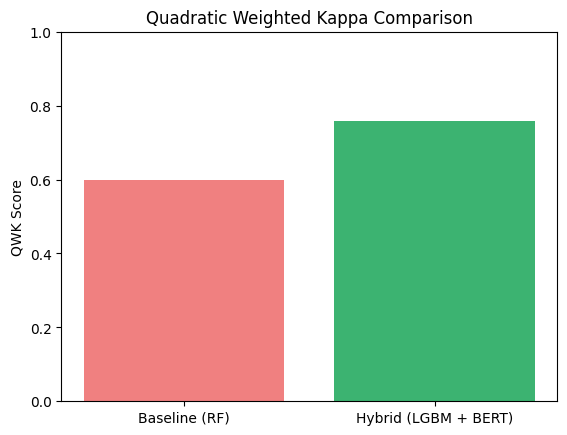

In [34]:
# Baseline results (replace with your earlier baseline scores)
baseline_qwk = 0.60  # Example — replace with your actual result

models = ["Baseline (RF)", "Hybrid (LGBM + BERT)"]
qwk_scores = [baseline_qwk, qwk]

plt.bar(models, qwk_scores, color=["lightcoral", "mediumseagreen"])
plt.title("Quadratic Weighted Kappa Comparison")
plt.ylabel("QWK Score")
plt.ylim(0, 1)
plt.show()


Step 6 — Save the Trained Hybrid Model

In [35]:
import joblib

joblib.dump(lgb_model, "hybrid_aes_model.pkl")
print("✅ Hybrid AES model saved as hybrid_aes_model.pkl")


✅ Hybrid AES model saved as hybrid_aes_model.pkl
